
# Preprocessing

The package offers preprocessing procedures.

- **Downsampling data**: by grouping data back blocks of fixed size (resolution) and applying the mean function to each block.
- **Normalization X,Y,Z coordinates**: normalizing the coordinates to the range [0,1] by subtracting the minimum and dividing by the maximum.
- **Standardization of V values**: standardizing the V values by subtracting the mean and dividing by the standard deviation.


## Downsampling

The downsampling procedure is implemented as taking the average of a block of given resolution. Can be easily customized.


## Normalization of XYZ and standardization of V

Normalizing the `XYZ` coordinates ensures that all the coordinates are within a similar range, which can help prevent one coordinate from dominating the kriging interpolation process. It is especially useful when the `XYZ` coordinates have different scales or units.

Standardizing the `V` values by centering them around 0 and giving them equal variances can help ensure that the kriging algorithm is not influenced by the absolute magnitude of `V`. This can be beneficial if the `V` values have a large range or if you want to focus more on the relative differences between `V` values rather than their absolute values.

By normalizing the XYZ coordinates and standardizing the `V` values, you align the scales of the different variables and make them more comparable, which can improve the performance of the kriging algorithm.

In [1]:
%load_ext autoreload
%autoreload 2

from py3Dinterpolations.core.griddata import GridData
from py3Dinterpolations.modelling.preprocessing import Preprocessing
from py3Dinterpolations.plotting.plotting import plot_downsampling

import pandas as pd

In [3]:
df = pd.read_csv(
    "../../../tests/fixtures/griddata_default_colnames.csv",
)
df.tail()

,ID,X,Y,Z,V
508,ID00,15.194,0.0,8,25.080662
509,ID00,15.194,0.0,7,19.047857
510,ID00,15.194,0.0,6,19.042223
511,ID00,15.194,0.0,5,14.111599
512,ID00,15.194,0.0,4,11.667224


In [7]:
gd = GridData(df)
gd.data.head()

V
ID   X      Y      Z            
ID30 62.163 14.336 19   7.523950
                   18   7.504403
                   17  10.089374
                   16  15.369461
                   15  11.836174

In [8]:
len(gd.data)

513

In [15]:
preproc_gd = Preprocessing(
    gd, 
    normalize_xyz=True, 
    standardize_v=True, 
    downsampling_res=2
).preprocess()

In [16]:
preproc_gd.data.head()

V
ID   X        Y        Z            
ID30 0.347923 0.194902 1.0 -0.522776
                       0.9 -0.523604
                       0.8 -0.314683
                       0.7 -0.305259
                       0.6 -0.080439

In [17]:
len(preproc_gd.data)

283

### Plot comparison of data before and after downsampling 

This method allows to plot the griddata before and after the downsampling. the plot allows to assess how the downsampling affects the data, by smoothing out peaks.


In [18]:
len(preproc_gd.data)

283

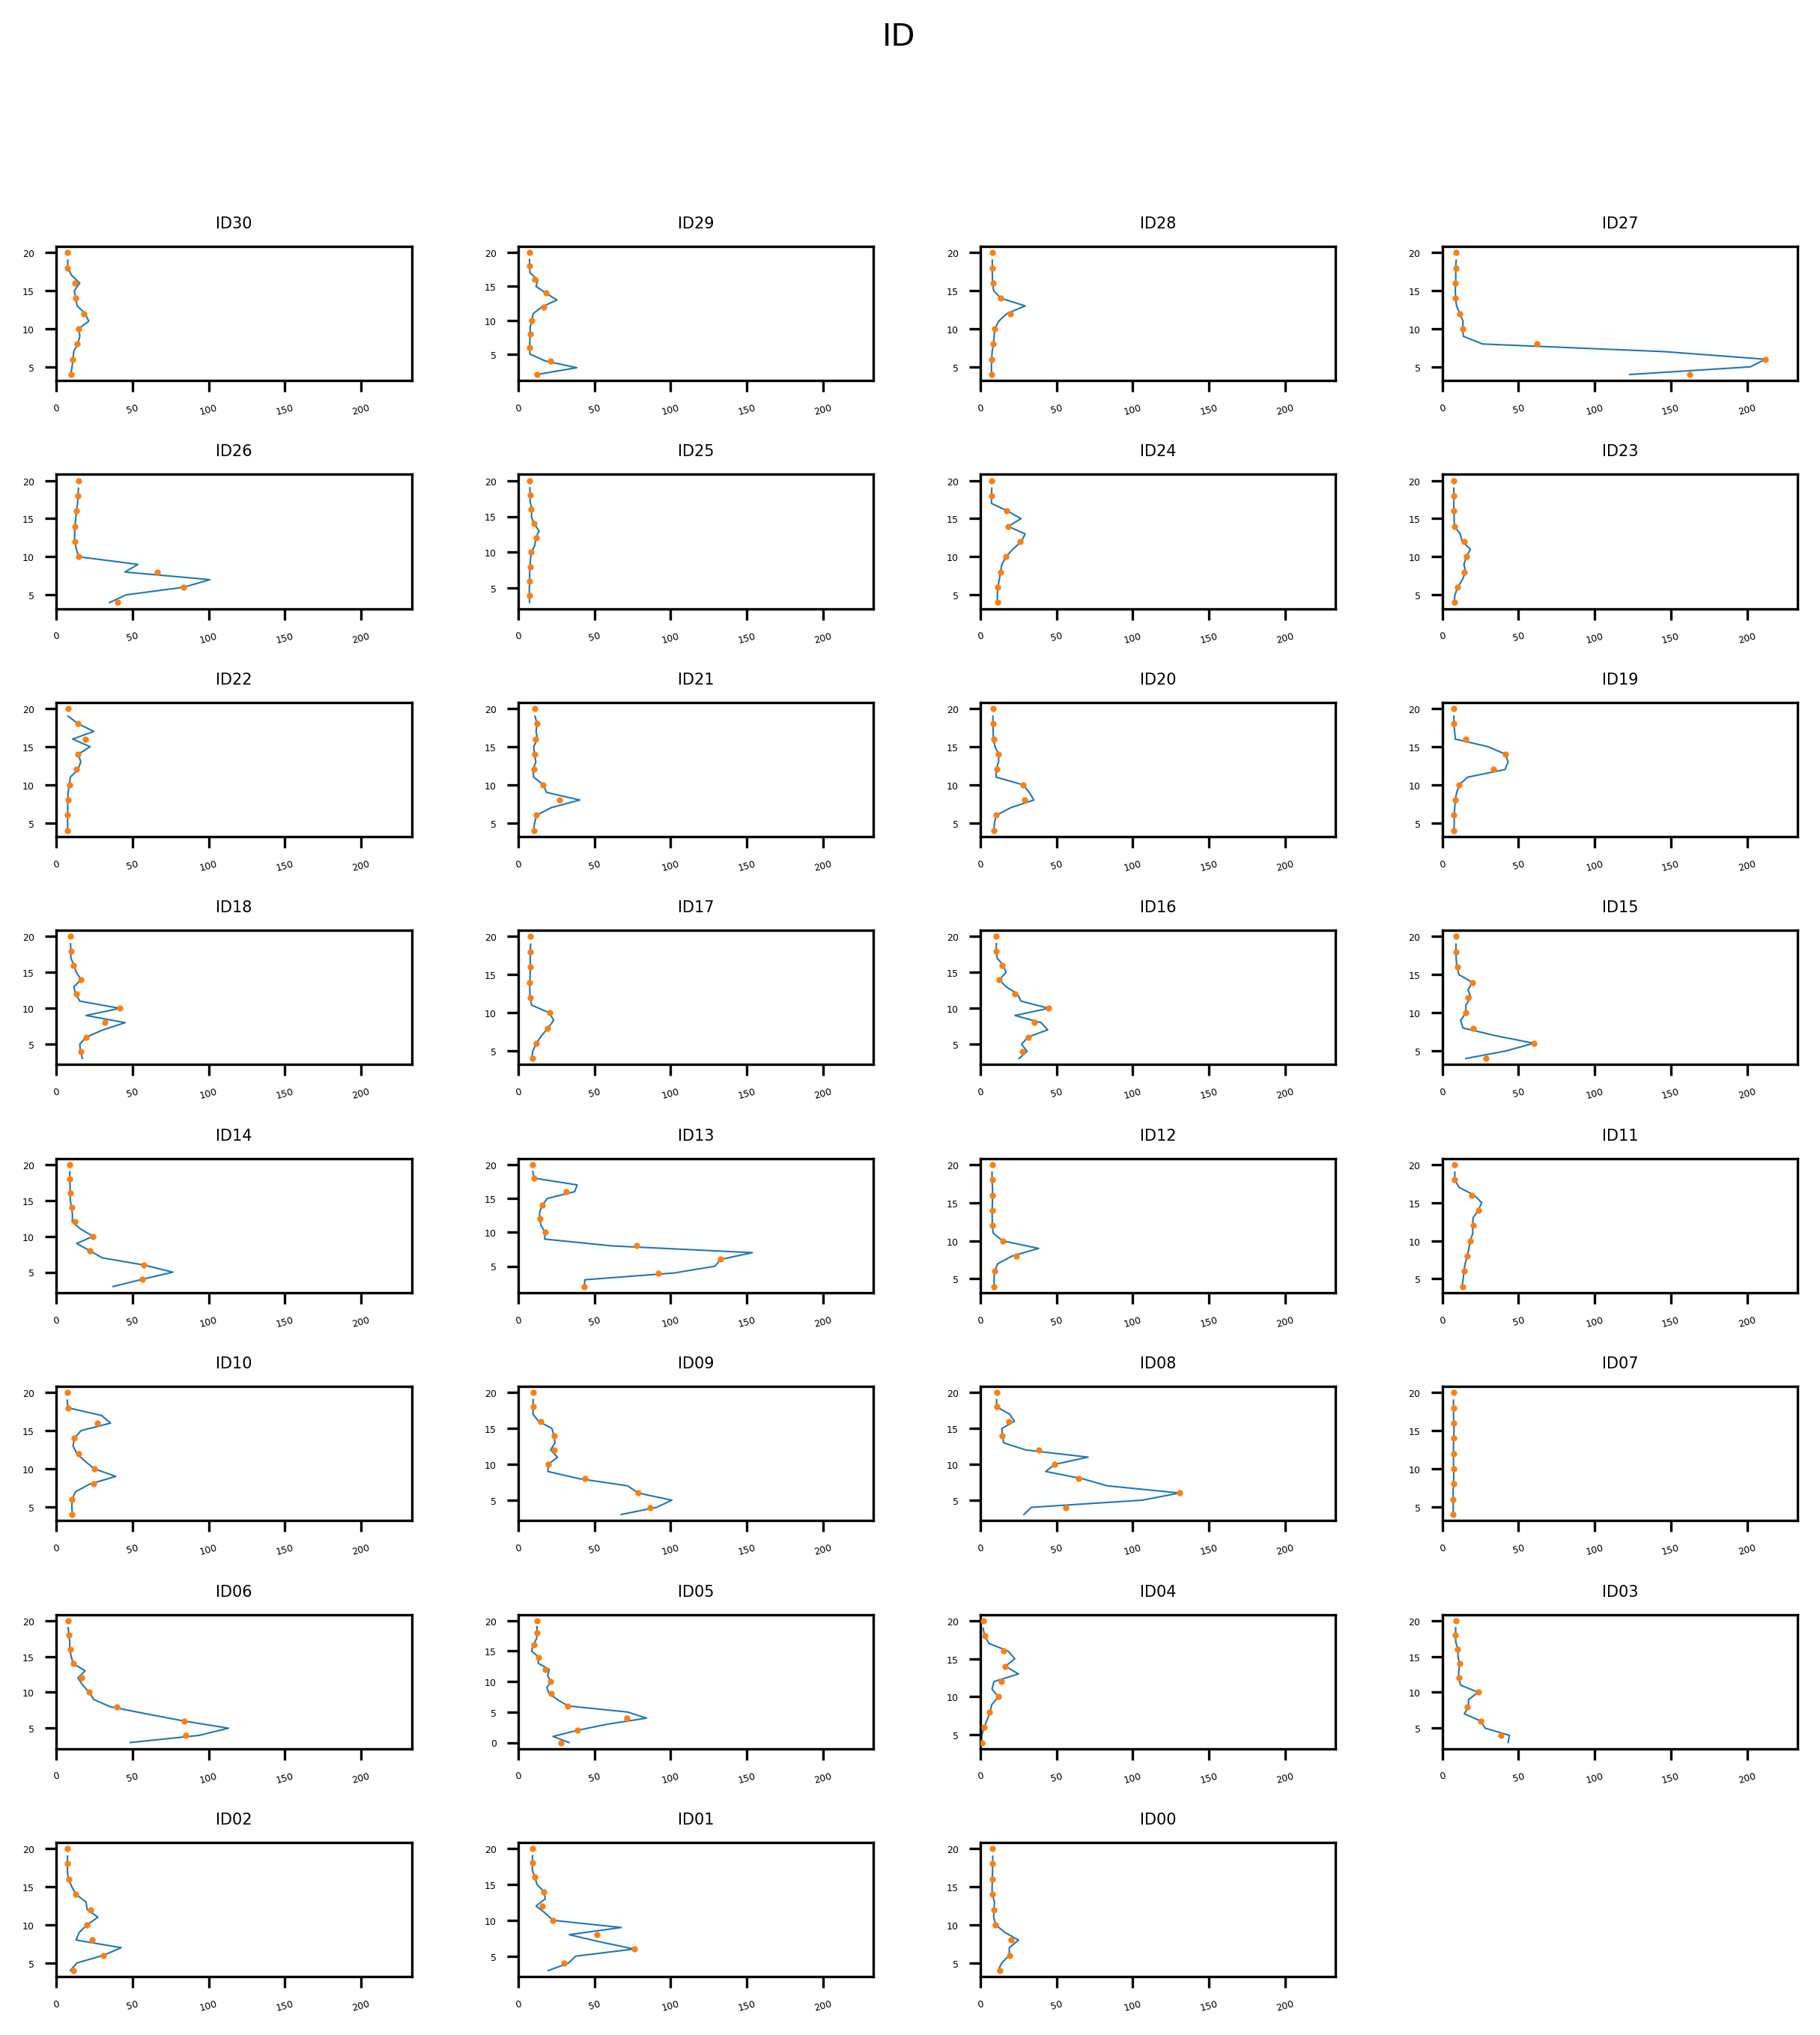

In [19]:
plot_downsampling(gd, preproc_gd)